In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv('IMDB Dataset.csv')

In [5]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [6]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [8]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

<AxesSubplot: xlabel='sentiment', ylabel='count'>

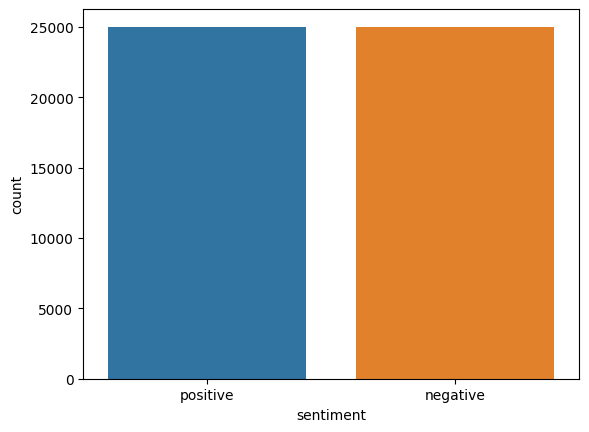

In [9]:
sns.countplot(x='sentiment',data=df)

In [10]:
df.duplicated().sum()

418

In [11]:
df.groupby('sentiment').describe()

review                                                            \
           count unique                                                top   
sentiment                                                                    
negative   25000  24698  This show comes up with interesting locations ...   
positive   25000  24884  Loved today's show!!! It was a variety and not...   

                
          freq  
sentiment       
negative     3  
positive     5

In [12]:
df['length'] = df['review'].apply(len)

In [13]:
df.head(10)

,review,sentiment,length
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317
5,"Probably my all-time favorite movie, a story o...",positive,656
6,I sure would like to see a resurrection of a u...,positive,726
7,"This show was an amazing, fresh & innovative i...",negative,934
8,Encouraged by the positive comments about this...,negative,681
9,If you like original gut wrenching laughter yo...,positive,176


Text(0, 0.5, 'frequency')

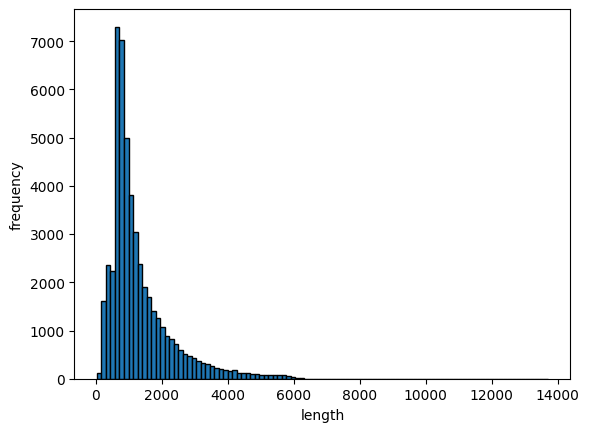

In [14]:
plt.hist(x='length',data=df,edgecolor = "black", bins = 100)
plt.xlabel('length')
plt.ylabel('frequency')

In [15]:
df['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [16]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
def remove_br_tags(text):
    cleaned_text = text.replace('<br />', '')
    return cleaned_text

df['review']= df['review'].apply(remove_br_tags)

In [18]:
def nopunct(mess):
    nopunc = [x for x in mess if x not in string.punctuation]
    nopunc = ''.join(nopunc)
    return nopunc

In [19]:
df['review']= df['review'].apply(nopunct)

In [20]:
df['review'][1]

'A wonderful little production The filming technique is very unassuming very oldtimeBBC fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece The actors are extremely well chosen Michael Sheen not only has got all the polari but he has all the voices down pat too You can truly see the seamless editing guided by the references to Williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece A masterful production about one of the great masters of comedy and his life The realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears It plays on our knowledge and our senses particularly with the scenes concerning Orton and Halliwell and the sets particularly of their flat with Halliwells murals decorating every surface are terribly well done'

In [21]:
from nltk.corpus import stopwords
stopwords.words('english')[0:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [22]:
def remove_stopword(mess):
    stpwrd = [char for char in mess if char not in stopwords.words('english')]
    stpwrd = ''.join(stpwrd)
    return stpwrd

In [23]:
#df['review'] = df['review'].apply(remove_stopword)

In [24]:
#df['review']

In [25]:
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize

In [26]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\S.D
[nltk_data]     HAIDER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\S.D
[nltk_data]     HAIDER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
def convert_slang(text):
    words = word_tokenize(text)
    converted_words = []

    for word in words:
        # Get synonyms for the current word
        synonyms = wordnet.synsets(word)
        
        # Use the first synonym as replacement (if available)
        replacement = synonyms[0].lemmas()[0].name() if synonyms else word
        converted_words.append(replacement)

    converted_text = " ".join(converted_words)
    return converted_text

In [28]:
df['review']=df['review'].apply(convert_slang)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
# Might take awhile...
bow_transformer = CountVectorizer(analyzer='word').fit(df['review'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

194555


In [31]:
reviews_bow = bow_transformer.transform(df['review'])

In [32]:
#print(reviews_bow[1])

In [33]:
mess1 = df['review'][1]
bow1= bow_transformer.transform([mess1])
#print(bow1.get_feature_names()[189202])

In [34]:
print('Shape of Sparse Matrix: ', reviews_bow.shape)
print('Amount of Non-Zero occurences: ', reviews_bow.nnz)

Shape of Sparse Matrix:  (50000, 194555)
Amount of Non-Zero occurences:  6659261


In [35]:
sparsity = (100.0 * reviews_bow.nnz / (reviews_bow.shape[0] * reviews_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [36]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(reviews_bow)



In [37]:
tfidf4 = tfidf_transformer.transform(bow1)
print(tfidf4)

  (0, 193211)	0.02919602317628637
  (0, 191592)	0.059254576849615964
  (0, 191305)	0.060940235187995746
  (0, 189800)	0.07186434286833875
  (0, 189202)	0.10108994743809877
  (0, 188332)	0.03898440090348077
  (0, 187133)	0.12098126565392234
  (0, 184440)	0.07431606637718217
  (0, 183140)	0.07273291586579218
  (0, 181827)	0.05143740861253964
  (0, 177420)	0.07266110328408659
  (0, 175995)	0.10228445495433199
  (0, 174279)	0.03725178012121115
  (0, 171744)	0.054989354803113566
  (0, 171083)	0.04428159990669356
  (0, 170669)	0.04005881473721541
  (0, 170509)	0.28303891328446823
  (0, 170203)	0.03994760479823892
  (0, 169884)	0.17576023624823936
  (0, 169863)	0.09236924528622346
  (0, 169013)	0.1964829952190754
  (0, 166442)	0.08639330859924783
  (0, 162466)	0.12462081779852728
  (0, 161684)	0.06958319639520501
  (0, 159074)	0.07461398086408304
  :	:
  (0, 61251)	0.06647901379922683
  (0, 58714)	0.04380421550714763
  (0, 58146)	0.05328324093474393
  (0, 56569)	0.10342444577842128
  (0, 5349

In [38]:
#To transform the entire bag-of-words corpus into TF-IDF corpus at once
reviews_tfidf = tfidf_transformer.transform(reviews_bow)
print(reviews_tfidf.shape)

(50000, 194555)


In [39]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(reviews_tfidf, df['sentiment'])

In [40]:
#Testing
print('predicted:',model.predict(tfidf4)[0])
print('expected:', df['sentiment'][0])

predicted: positive
expected: positive


In [41]:
#Predictions
all_predictions = model.predict(reviews_tfidf)
print(all_predictions)

['positive' 'positive' 'positive' ... 'negative' 'negative' 'negative']


In [61]:
from sklearn.metrics import classification_report
print (classification_report(df['sentiment'], all_predictions))

              precision    recall  f1-score   support

    negative       0.89      0.93      0.91     25000
    positive       0.92      0.88      0.90     25000

    accuracy                           0.90     50000
   macro avg       0.91      0.90      0.90     50000
weighted avg       0.91      0.90      0.90     50000



In [63]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(df['review'],df['sentiment'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

40000 10000 50000


In [65]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer='word')),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [66]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [67]:
predictions = pipeline.predict(msg_test)

In [68]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

    negative       0.88      0.83      0.86      5235
    positive       0.83      0.88      0.85      4765

    accuracy                           0.85     10000
   macro avg       0.85      0.86      0.85     10000
weighted avg       0.86      0.85      0.85     10000



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df= pd.read_csv('IMDB Dataset.csv')


import string
string.punctuation

def remove_br_tags(text):
    cleaned_text = text.replace('<br />', '')
    return cleaned_text

df['review']= df['review'].apply(remove_br_tags)

def nopunct(mess):
    nopunc = [x for x in mess if x not in string.punctuation]
    nopunc = ''.join(nopunc)
    return nopunc

df['review']= df['review'].apply(nopunct)


import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('wordnet')


def convert_slang(text):
    words = word_tokenize(text)
    converted_words = []

    for word in words:
        # Get synonyms for the current word
        synonyms = wordnet.synsets(word)
        
        # Use the first synonym as replacement (if available)
        replacement = synonyms[0].lemmas()[0].name() if synonyms else word
        converted_words.append(replacement)

    converted_text = " ".join(converted_words)
    return converted_text


df['review']=df['review'].apply(convert_slang)

from sklearn.feature_extraction.text import CountVectorizer
# Might take awhile...
bow_transformer = CountVectorizer(analyzer='word').fit(df['review'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

reviews_bow = bow_transformer.transform(df['review'])

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(reviews_bow)
#To transform the entire bag-of-words corpus into TF-IDF corpus at once
reviews_tfidf = tfidf_transformer.transform(reviews_bow)
print(reviews_tfidf.shape)

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(reviews_tfidf, df['sentiment'])

all_predictions = model.predict(reviews_tfidf)